<a href="https://colab.research.google.com/github/abhiWriteCode/Small-Machine-Learning-Projects/blob/master/CIFAR10_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install 'torch==0.4.0'
!pip3 install 'torchvision==0.2.1'
!pip3 install --no-cache-dir -I 'pillow==5.1.0'
!pip install torchsummary


# Restart Kernel
# This workaround is needed to properly upgrade PIL on Google Colab.
import os
os._exit(00)

    100% |████████████████████████████████| 2.0MB 50.3MB/s 


In [0]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import datasets, transforms
%matplotlib inline

In [2]:
mean, std = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
batch_size = 8

transform_train = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean, std)])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


transform_test = transforms.Compose([transforms.ToTensor(), 
                                     transforms.Normalize(mean, std)])

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    img = img.numpy()
    plt.imshow(img.transpose((1, 2, 0)))
    plt.show()

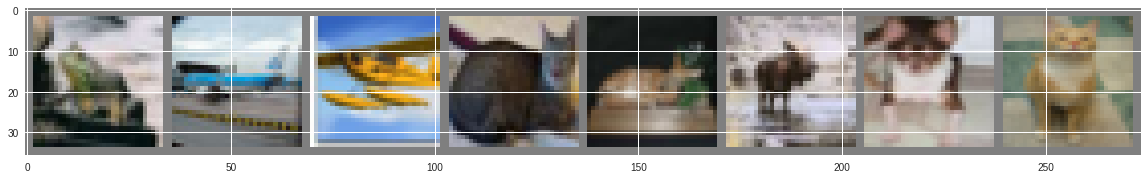

 frog plane plane   cat  deer  deer   dog   cat


In [4]:
# show images
plt.figure(figsize=(20,6))
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [0]:
import torch.nn as nn
import torch.nn.functional  as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1) # same padding
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)  # in_channels=32 (=out_channels of conv1), out_channels=32, kernel_size=3
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        self.dropout = nn.Dropout(p=0.2)
        self.linear1 = nn.Linear(in_features=64*8*8, out_features=128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 10)
        
    def forward(self, x):
        # x.shape is 
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = self.dropout(x)
#         x = F.relu(self.conv2(x))
        # x.shape is 
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.maxpool(x)
        x = self.dropout(x)
        # x.shape is 
        x = x.view(-1, 64*8*8) # flatten
        x = F.relu(self.linear1(x))
        x = self.dropout(x)
        x = F.relu(self.linear2(x))
        x = F.log_softmax(self.linear3(x), dim=1)
        
        return x
        
model = Network()

In [6]:
images.shape

torch.Size([8, 3, 32, 32])

In [0]:
import torch.optim as optim

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

if device:
  print('Thanks google')
  model.to(device)

cuda
Thanks google


In [9]:
from torchsummary import summary

summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
            Conv2d-2           [-1, 32, 32, 32]           9,248
         MaxPool2d-3           [-1, 32, 16, 16]               0
           Dropout-4           [-1, 32, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]          18,496
            Conv2d-6           [-1, 64, 16, 16]          36,928
         MaxPool2d-7             [-1, 64, 8, 8]               0
           Dropout-8             [-1, 64, 8, 8]               0
            Linear-9                  [-1, 128]         524,416
          Dropout-10                  [-1, 128]               0
           Linear-11                   [-1, 64]           8,256
           Linear-12                   [-1, 10]             650
Total params: 598,890
Trainable params: 598,890
Non-trainable params: 0
-------------------------------

In [10]:
model.linear1.weight

Parameter containing:
tensor([[-1.3784e-02,  5.0808e-03,  9.2555e-03,  ..., -8.9592e-03,
          1.2127e-02,  7.8528e-03],
        [-5.1273e-03,  9.7354e-03, -9.4161e-03,  ..., -1.4950e-03,
          1.5321e-03,  9.2326e-03],
        [ 2.2115e-03, -3.7791e-03, -9.8020e-03,  ..., -1.4602e-02,
          3.7269e-03,  1.3843e-02],
        ...,
        [-9.5121e-03, -4.6340e-03, -5.6951e-03,  ...,  1.4432e-02,
         -1.2382e-02, -7.8046e-03],
        [-8.9251e-03, -8.5760e-03, -1.1994e-02,  ..., -1.5623e-02,
         -6.5344e-03,  3.2269e-03],
        [ 3.6372e-03, -7.9436e-03,  8.8017e-03,  ..., -1.2402e-02,
         -8.5010e-03,  9.6311e-03]], device='cuda:0')

In [0]:
def train(epochs=20):
  print('Training started')
  train_losses, test_losses = [], []
    
  for e in range(epochs):
    running_loss = 0
    
    for images, labels in trainloader:

      if device:
        images, labels = images.to(device), labels.to(device)

      optimizer.zero_grad()

      log_ps = model(images)
      loss = criterion(log_ps, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()

    else:
      test_loss = 0
      accuracy = 0

      # Turn off gradients for validation, saves memory and computations
      with torch.no_grad():
        model.eval()
        for images, labels in testloader:
          
          if device:
            images, labels = images.to(device), labels.to(device)
            
          log_ps = model(images)
          test_loss += criterion(log_ps, labels)

          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.cuda.FloatTensor))

      model.train()

      train_losses.append(running_loss/len(trainloader))
      test_losses.append(test_loss/len(testloader))

      print("Epoch: {}/{}.. ".format(e+1, epochs),
            "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
            "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
            "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
      
  print('Finished training')
  return train_losses, test_losses

In [12]:
%%time
train_losses, test_losses = train(epochs=5)

Training started
Epoch: 1/5..  Training Loss: 1.830..  Test Loss: 1.674..  Test Accuracy: 0.381
Epoch: 2/5..  Training Loss: 1.660..  Test Loss: 1.578..  Test Accuracy: 0.419
Epoch: 3/5..  Training Loss: 1.603..  Test Loss: 1.548..  Test Accuracy: 0.438
Epoch: 4/5..  Training Loss: 1.587..  Test Loss: 1.518..  Test Accuracy: 0.448
Epoch: 5/5..  Training Loss: 1.569..  Test Loss: 1.501..  Test Accuracy: 0.449
Finished training
CPU times: user 4min 52s, sys: 1min 24s, total: 6min 17s
Wall time: 6min 30s


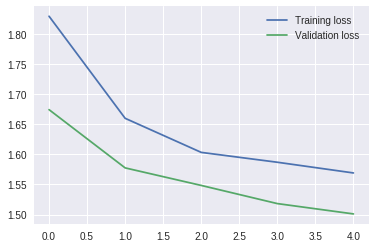

In [13]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

plt.show()